<a href="https://colab.research.google.com/github/rickytjoe/IYKRA-Data-MBA-Clustering-/blob/master/Ricky_Task7_DataMBA_Batch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Data

In [ ]:
data = pd.read_csv('C:\\Users\\LENOVO\\Downloads\\transactions1.csv', sep=";",low_memory=False)


In [ ]:
data.head()

,transaction_id,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,...,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,5533441,733493772,733493772,5000,5000.0,2016-01-08T19:04:50,111.33,Lyft,US,US,...,True,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False
1,5533442,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,...,False,NaN,111.33,NaN,NaN,NaN,False,NaN,NaN,False
2,5533443,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.4,Lyft,US,US,...,False,NaN,136.08,NaN,NaN,NaN,False,NaN,NaN,False
3,5533444,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,...,True,NaN,323.48,NaN,NaN,NaN,False,NaN,NaN,False
4,5533445,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.0,Lyft,US,US,...,False,NaN,550.82,NaN,NaN,NaN,False,NaN,NaN,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   transaction_id            641914 non-null  int64  
 1   accountNumber             641914 non-null  int64  
 2   customerId                641914 non-null  int64  
 3   creditLimit               641914 non-null  int64  
 4   availableMoney            641914 non-null  object 
 5   transactionDateTime       641914 non-null  object 
 6   transactionAmount         641914 non-null  object 
 7   merchantName              641914 non-null  object 
 8   acqCountry                638001 non-null  object 
 9   merchantCountryCode       641290 non-null  object 
 10  posEntryMode              638569 non-null  float64
 11  posConditionCode          641627 non-null  float64
 12  merchantCategoryCode      641914 non-null  object 
 13  currentExpDate            641914 non-null  o

# Converting Data Types

In [ ]:
import datetime
data['transactionDateTime'] = pd.to_datetime(data['transactionDateTime'], format="%Y-%m-%dT%H:%M:%S")
data['accountOpenDate'] = pd.to_datetime(data['accountOpenDate'], format="%d/%m/%Y")
data['dateOfLastAddressChange'] = pd.to_datetime(data['dateOfLastAddressChange'], format="%d/%m/%Y")
data['currentExpDate'] = pd.to_datetime(data['currentExpDate'], format="%d/%m/%Y")
data['availableMoney'] =pd.to_numeric(data["availableMoney"], errors='coerce')
data['transactionAmount'] =pd.to_numeric(data["transactionAmount"], errors='coerce')
data['currentBalance'] =pd.to_numeric(data["currentBalance"], errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   transaction_id            641914 non-null  int64         
 1   accountNumber             641914 non-null  int64         
 2   customerId                641914 non-null  int64         
 3   creditLimit               641914 non-null  int64         
 4   availableMoney            641635 non-null  float64       
 5   transactionDateTime       641914 non-null  datetime64[ns]
 6   transactionAmount         640098 non-null  float64       
 7   merchantName              641914 non-null  object        
 8   acqCountry                638001 non-null  object        
 9   merchantCountryCode       641290 non-null  object        
 10  posEntryMode              638569 non-null  float64       
 11  posConditionCode          641627 non-null  float64       
 12  me

# Missing Value Handling

In [ ]:
data.isnull().sum()

transaction_id                   0
accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                 279
transactionDateTime              0
transactionAmount             1816
merchantName                     0
acqCountry                    3913
merchantCountryCode            624
posEntryMode                  3345
posConditionCode               287
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                589
isFraud                          0
echoBuffer                  641914
currentBalance                 120
merchantCity                641914
merchantState               641914
merchantZip                 641914
cardPresent                      0
posOnPremises               641914
recurringAuthInd    

In [ ]:
data['acqCountry'].fillna(data['acqCountry'].mode()[0], inplace = True)
data['merchantCountryCode'].fillna(data['merchantCountryCode'].mode()[0], inplace = True)
data['posEntryMode'].fillna(data['posEntryMode'].mode()[0], inplace = True)
data['posConditionCode'].fillna(data['posConditionCode'].mode()[0], inplace = True)
data['transactionType'].fillna(data['transactionType'].mode()[0], inplace = True)
data['transactionType'].fillna(data['transactionType'].mode()[0], inplace = True)
data['availableMoney'].fillna(data['availableMoney'].median(), inplace = True)
data['transactionAmount'].fillna(data['transactionAmount'].median(), inplace = True)
data['currentBalance'].fillna(data['currentBalance'].median(), inplace = True)
data.drop(['transaction_id','echoBuffer','merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd'], axis=1,inplace=True)

In [ ]:
data.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
isFraud                     0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             641914 non-null  int64         
 1   customerId                641914 non-null  int64         
 2   creditLimit               641914 non-null  int64         
 3   availableMoney            641914 non-null  float64       
 4   transactionDateTime       641914 non-null  datetime64[ns]
 5   transactionAmount         641914 non-null  float64       
 6   merchantName              641914 non-null  object        
 7   acqCountry                641914 non-null  object        
 8   merchantCountryCode       641914 non-null  object        
 9   posEntryMode              641914 non-null  float64       
 10  posConditionCode          641914 non-null  float64       
 11  merchantCategoryCode      641914 non-null  object        
 12  cu

# EDA

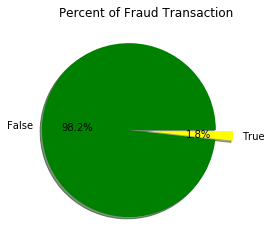

In [ ]:
labels = data['isFraud'].value_counts(sort = True).index
sizes =  data['isFraud'].value_counts(sort = True)

colors = ["Green","Yellow"]
explode = (0.2,0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=360)

plt.title('Percent of Fraud Transaction')
plt.show()

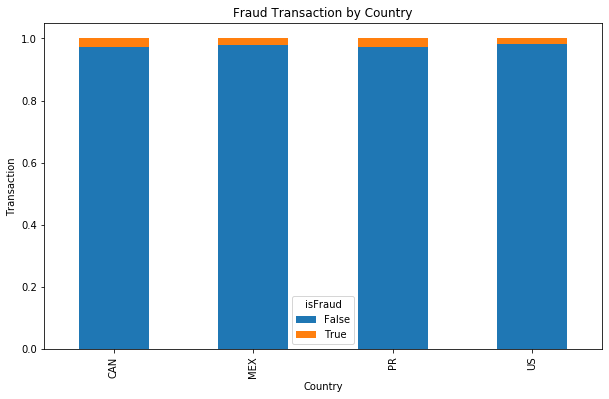

In [ ]:
table=pd.crosstab(data.acqCountry,data.isFraud)
table.div(table.sum(1).astype(float), axis=0).plot(figsize=(10,6),kind='bar', stacked=True)
plt.title('Fraud Transaction by Country')
plt.xlabel('Country')
plt.ylabel('Transaction')
plt.show()


In [ ]:
table=pd.crosstab(data.acqCountry,data.isFraud,normalize='index')
table

isFraud,False,True
acqCountry,,
CAN,0.973262,0.026738
MEX,0.977913,0.022087
PR,0.973378,0.026622
US,0.982456,0.017544


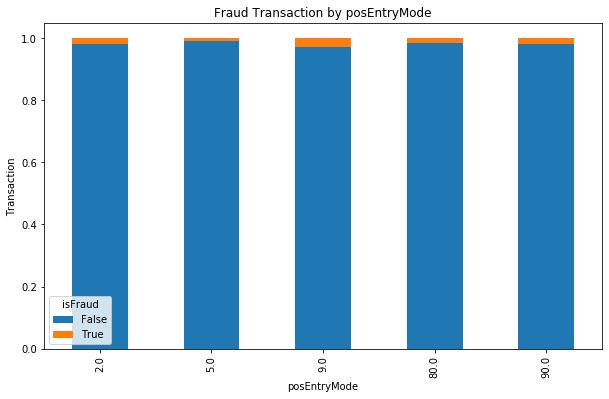

In [ ]:
table=pd.crosstab(data.posEntryMode,data.isFraud)
table.div(table.sum(1).astype(float), axis=0).plot(figsize=(10,6),kind='bar', stacked=True)
plt.title('Fraud Transaction by posEntryMode')
plt.xlabel('posEntryMode')
plt.ylabel('Transaction')
plt.show()

In [ ]:
table=pd.crosstab(data.posEntryMode,data.isFraud,normalize='index')
table

isFraud,False,True
posEntryMode,,
2.0,0.980945,0.019055
5.0,0.990972,0.009028
9.0,0.972116,0.027884
80.0,0.985373,0.014627
90.0,0.979817,0.020183


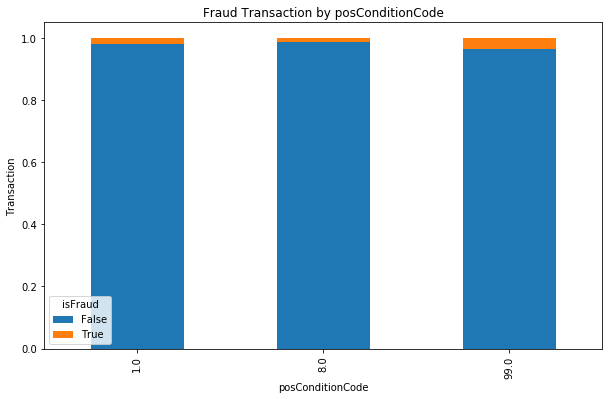

In [ ]:
table=pd.crosstab(data.posConditionCode,data.isFraud)
table.div(table.sum(1).astype(float), axis=0).plot(figsize=(10,6),kind='bar', stacked=True)
plt.title('Fraud Transaction by posConditionCode')
plt.xlabel('posConditionCode')
plt.ylabel('Transaction')
plt.show()

In [ ]:
table=pd.crosstab(data.posConditionCode,data.isFraud,normalize='index')
table

isFraud,False,True
posConditionCode,,
1.0,0.981735,0.018265
8.0,0.986124,0.013876
99.0,0.963186,0.036814


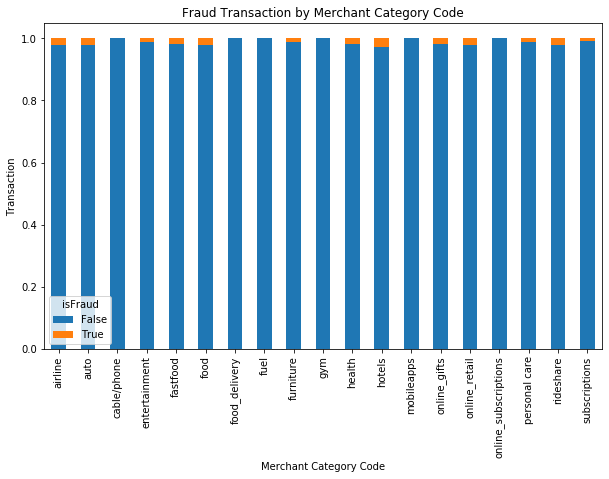

In [ ]:
table=pd.crosstab(data.merchantCategoryCode,data.isFraud)
table.div(table.sum(1).astype(float), axis=0).plot(figsize=(10,6),kind='bar', stacked=True)
plt.title('Fraud Transaction by Merchant Category Code')
plt.xlabel('Merchant Category Code')
plt.ylabel('Transaction')
plt.show()

In [ ]:
table=pd.crosstab(data.merchantCategoryCode,data.isFraud,normalize='index')
table

isFraud,False,True
merchantCategoryCode,,
airline,0.979379,0.020621
auto,0.979206,0.020794
cable/phone,1.000000,0.000000
entertainment,0.986578,0.013422
fastfood,0.982835,0.017165
food,0.979632,0.020368
food_delivery,1.000000,0.000000
fuel,1.000000,0.000000
furniture,0.987201,0.012799


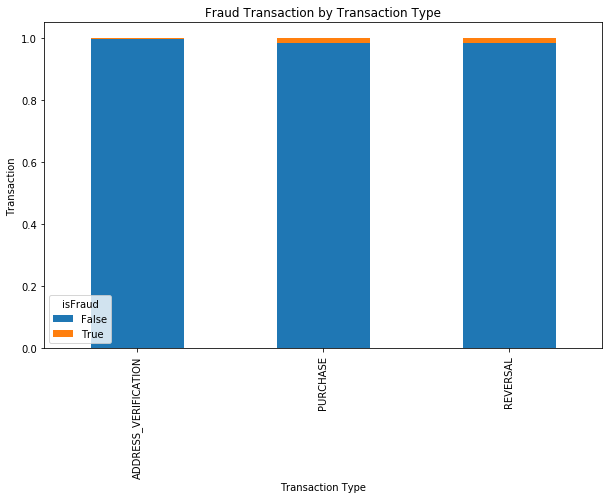

In [ ]:
table=pd.crosstab(data.transactionType,data.isFraud)
table.div(table.sum(1).astype(float), axis=0).plot(figsize=(10,6),kind='bar', stacked=True)
plt.title('Fraud Transaction by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction')
plt.show()

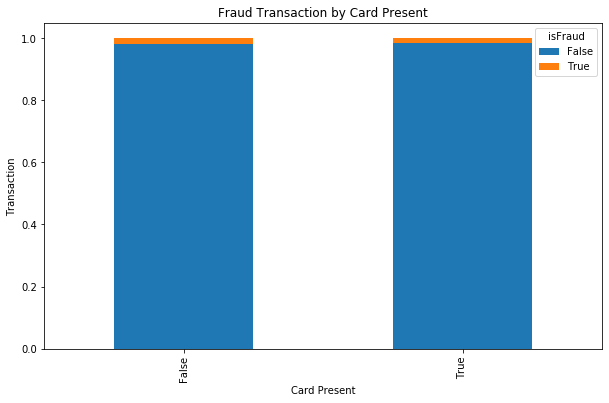

In [ ]:
table=pd.crosstab(data.cardPresent,data.isFraud)
table.div(table.sum(1).astype(float), axis=0).plot(figsize=(10,6),kind='bar', stacked=True)
plt.title('Fraud Transaction by Card Present')
plt.xlabel('Card Present')
plt.ylabel('Transaction')
plt.show()

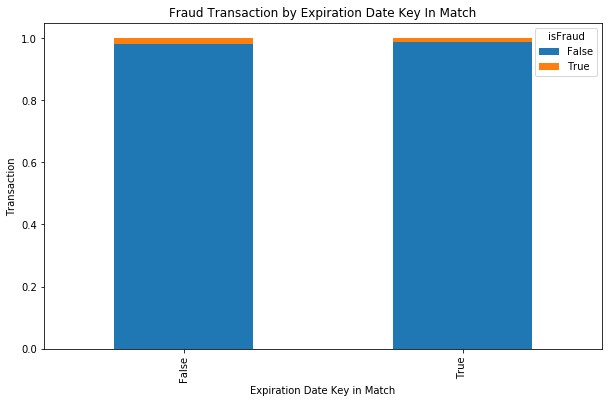

In [ ]:
table=pd.crosstab(data.expirationDateKeyInMatch,data.isFraud)
table.div(table.sum(1).astype(float), axis=0).plot(figsize=(10,6),kind='bar', stacked=True)
plt.title('Fraud Transaction by Expiration Date Key In Match')
plt.xlabel('Expiration Date Key in Match')
plt.ylabel('Transaction')
plt.show()

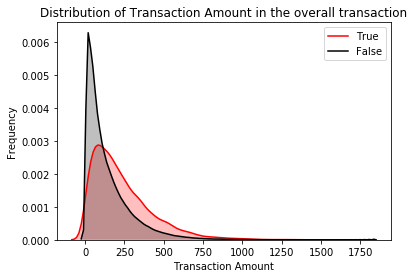

In [ ]:
g = sns.kdeplot(data.transactionAmount[(data["isFraud"] == True) ], color="Red", shade = True)
g = sns.kdeplot(data.transactionAmount[(data["isFraud"] == False) ], ax =g, color="black", shade= True)
g.set_xlabel("Transaction Amount")
g.set_ylabel("Frequency")
plt.title('Distribution of Transaction Amount in the overall transaction')
g = g.legend([True, False])

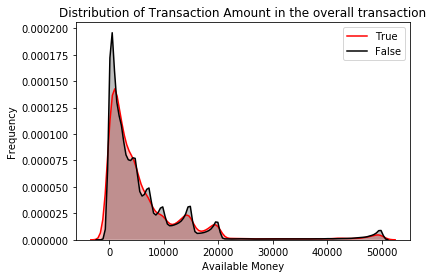

In [ ]:
g = sns.kdeplot(data.availableMoney[(data["isFraud"] == True) ], color="Red", shade = True)
g = sns.kdeplot(data.availableMoney[(data["isFraud"] == False) ], ax =g, color="Black", shade= True)
g.set_xlabel("Available Money")
g.set_ylabel("Frequency")
plt.title('Distribution of Transaction Amount in the overall transaction')
g = g.legend([True, False])

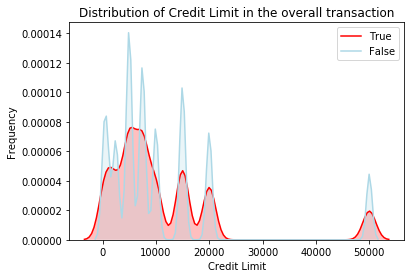

In [ ]:
g = sns.kdeplot(data.creditLimit[(data["isFraud"] == True) ], color="Red", shade = True)
g = sns.kdeplot(data.creditLimit[(data["isFraud"] == False) ], ax =g, color="lightblue", shade= True)
g.set_xlabel("Credit Limit")
g.set_ylabel("Frequency")
plt.title('Distribution of Credit Limit in the overall transaction')
g = g.legend([True, False])

# Feature Engineering

In [ ]:
data.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08 19:04:50,111.33,Lyft,US,US,5.0,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,0.00,False,False
1,733493772,733493772,5000,4888.67,2016-01-09 22:32:39,24.75,Uber,US,US,9.0,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,111.33,False,False
2,733493772,733493772,5000,4863.92,2016-01-11 13:36:55,187.40,Lyft,US,US,5.0,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,136.08,False,False
3,733493772,733493772,5000,4676.52,2016-01-11 22:47:46,227.34,Lyft,US,US,2.0,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,323.48,False,False
4,733493772,733493772,5000,4449.18,2016-01-16 01:41:11,0.00,Lyft,US,US,2.0,...,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,550.82,False,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             641914 non-null  int64         
 1   customerId                641914 non-null  int64         
 2   creditLimit               641914 non-null  int64         
 3   availableMoney            641914 non-null  float64       
 4   transactionDateTime       641914 non-null  datetime64[ns]
 5   transactionAmount         641914 non-null  float64       
 6   merchantName              641914 non-null  object        
 7   acqCountry                641914 non-null  object        
 8   merchantCountryCode       641914 non-null  object        
 9   posEntryMode              641914 non-null  float64       
 10  posConditionCode          641914 non-null  float64       
 11  merchantCategoryCode      641914 non-null  object        
 12  cu

In [ ]:
tmp_df = data

In [ ]:
tmp_df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08 19:04:50,111.33,Lyft,US,US,5.0,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,0.00,False,False
1,733493772,733493772,5000,4888.67,2016-01-09 22:32:39,24.75,Uber,US,US,9.0,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,111.33,False,False
2,733493772,733493772,5000,4863.92,2016-01-11 13:36:55,187.40,Lyft,US,US,5.0,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,136.08,False,False
3,733493772,733493772,5000,4676.52,2016-01-11 22:47:46,227.34,Lyft,US,US,2.0,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,323.48,False,False
4,733493772,733493772,5000,4449.18,2016-01-16 01:41:11,0.00,Lyft,US,US,2.0,...,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,550.82,False,False


In [ ]:
tmp_df['daysSinceRegister'] = tmp_df['accountOpenDate'].sub(tmp_df['transactionDateTime'], axis=0)
tmp_df['daysSinceRegister']  = tmp_df['daysSinceRegister']  / np.timedelta64(1, 'D')

In [ ]:
tmp_df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,daysSinceRegister
0,733493772,733493772,5000,5000.00,2016-01-08 19:04:50,111.33,Lyft,US,US,5.0,...,2014-08-03,492,492,9184,PURCHASE,True,0.00,False,False,-523.795023
1,733493772,733493772,5000,4888.67,2016-01-09 22:32:39,24.75,Uber,US,US,9.0,...,2014-08-03,492,492,9184,PURCHASE,False,111.33,False,False,-524.939340
2,733493772,733493772,5000,4863.92,2016-01-11 13:36:55,187.40,Lyft,US,US,5.0,...,2014-08-03,492,492,9184,PURCHASE,False,136.08,False,False,-526.567303
3,733493772,733493772,5000,4676.52,2016-01-11 22:47:46,227.34,Lyft,US,US,2.0,...,2014-08-03,492,492,9184,PURCHASE,True,323.48,False,False,-526.949838
4,733493772,733493772,5000,4449.18,2016-01-16 01:41:11,0.00,Lyft,US,US,2.0,...,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,550.82,False,False,-531.070266


In [ ]:
tmp_df['daysToExpiration'] = tmp_df['currentExpDate'].sub(tmp_df['transactionDateTime'], axis=0)
tmp_df['daysToExpiration']  = tmp_df['daysToExpiration']  / np.timedelta64(1, 'D')

In [ ]:
tmp_df['daySinceLastAddressChange'] = tmp_df['dateOfLastAddressChange'].sub(tmp_df['transactionDateTime'], axis=0)
tmp_df['daySinceLastAddressChange']  = tmp_df['daySinceLastAddressChange']  / np.timedelta64(1, 'D')

In [ ]:
tmp_df['LastAddressChangeDiff'] = tmp_df['dateOfLastAddressChange'].sub(tmp_df['accountOpenDate'], axis=0)
tmp_df['LastAddressChangeDiff']  = tmp_df['LastAddressChangeDiff']  / np.timedelta64(1, 'D')

In [ ]:
tmp_df['trx_hour'] = tmp_df['transactionDateTime'].apply(lambda x: pd.to_datetime(x).hour)
tmp_df['trx_day_of_week'] = tmp_df['transactionDateTime'].apply(lambda x: pd.to_datetime(x).dayofweek)
tmp_df['trx_day'] = tmp_df['transactionDateTime'].apply(lambda x: pd.to_datetime(x).day)
tmp_df['trx_month'] = tmp_df['transactionDateTime'].apply(lambda x: pd.to_datetime(x).month)

In [ ]:
tmp_df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,cardPresent,expirationDateKeyInMatch,daysSinceRegister,daysToExpiration,daySinceLastAddressChange,LastAddressChangeDiff,trx_hour,trx_day_of_week,trx_day,trx_month
0,733493772,733493772,5000,5000.00,2016-01-08 19:04:50,111.33,Lyft,US,US,5.0,...,False,False,-523.795023,1544.204977,-523.795023,0.0,19,4,8,1
1,733493772,733493772,5000,4888.67,2016-01-09 22:32:39,24.75,Uber,US,US,9.0,...,False,False,-524.939340,2699.060660,-524.939340,0.0,22,5,9,1
2,733493772,733493772,5000,4863.92,2016-01-11 13:36:55,187.40,Lyft,US,US,5.0,...,False,False,-526.567303,4341.432697,-526.567303,0.0,13,0,11,1
3,733493772,733493772,5000,4676.52,2016-01-11 22:47:46,227.34,Lyft,US,US,2.0,...,False,False,-526.949838,4981.050162,-526.949838,0.0,22,0,11,1
4,733493772,733493772,5000,4449.18,2016-01-16 01:41:11,0.00,Lyft,US,US,2.0,...,False,False,-531.070266,3180.929734,-531.070266,0.0,1,5,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641909,186770399,186770399,7500,2574.02,2016-12-04 12:29:21,5.37,Apple iTunes,US,US,5.0,...,False,False,-396.520382,4775.479618,-184.520382,212.0,12,6,4,12
641910,186770399,186770399,7500,2568.65,2016-12-09 04:20:35,223.70,Blue Mountain eCards,US,US,9.0,...,False,False,-401.180961,3429.819039,-189.180961,212.0,4,4,9,12
641911,186770399,186770399,7500,2344.95,2016-12-16 07:58:23,138.42,Fresh Flowers,US,US,2.0,...,False,False,-408.332211,1018.667789,-196.332211,212.0,7,4,16,12
641912,186770399,186770399,7500,2206.53,2016-12-19 02:30:35,16.31,abc.com,US,US,9.0,...,False,False,-411.104572,4699.895428,-199.104572,212.0,2,0,19,12


In [ ]:
tmp_df['CVVMatch'] = np.where((tmp_df['cardCVV'] == tmp_df['enteredCVV']), True, False)

In [ ]:
tmp_df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,expirationDateKeyInMatch,daysSinceRegister,daysToExpiration,daySinceLastAddressChange,LastAddressChangeDiff,trx_hour,trx_day_of_week,trx_day,trx_month,CVVMatch
0,733493772,733493772,5000,5000.00,2016-01-08 19:04:50,111.33,Lyft,US,US,5.0,...,False,-523.795023,1544.204977,-523.795023,0.0,19,4,8,1,True
1,733493772,733493772,5000,4888.67,2016-01-09 22:32:39,24.75,Uber,US,US,9.0,...,False,-524.939340,2699.060660,-524.939340,0.0,22,5,9,1,True
2,733493772,733493772,5000,4863.92,2016-01-11 13:36:55,187.40,Lyft,US,US,5.0,...,False,-526.567303,4341.432697,-526.567303,0.0,13,0,11,1,True
3,733493772,733493772,5000,4676.52,2016-01-11 22:47:46,227.34,Lyft,US,US,2.0,...,False,-526.949838,4981.050162,-526.949838,0.0,22,0,11,1,True
4,733493772,733493772,5000,4449.18,2016-01-16 01:41:11,0.00,Lyft,US,US,2.0,...,False,-531.070266,3180.929734,-531.070266,0.0,1,5,16,1,True


In [ ]:
tmp_df.drop(columns=['transactionDateTime','accountOpenDate','currentExpDate','dateOfLastAddressChange','cardCVV','enteredCVV',
                     'cardLast4Digits','merchantName'], axis = 1,inplace = True)
tmp_df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,...,expirationDateKeyInMatch,daysSinceRegister,daysToExpiration,daySinceLastAddressChange,LastAddressChangeDiff,trx_hour,trx_day_of_week,trx_day,trx_month,CVVMatch
0,733493772,733493772,5000,5000.00,111.33,US,US,5.0,1.0,rideshare,...,False,-523.795023,1544.204977,-523.795023,0.0,19,4,8,1,True
1,733493772,733493772,5000,4888.67,24.75,US,US,9.0,1.0,rideshare,...,False,-524.939340,2699.060660,-524.939340,0.0,22,5,9,1,True
2,733493772,733493772,5000,4863.92,187.40,US,US,5.0,1.0,rideshare,...,False,-526.567303,4341.432697,-526.567303,0.0,13,0,11,1,True
3,733493772,733493772,5000,4676.52,227.34,US,US,2.0,1.0,rideshare,...,False,-526.949838,4981.050162,-526.949838,0.0,22,0,11,1,True
4,733493772,733493772,5000,4449.18,0.00,US,US,2.0,1.0,rideshare,...,False,-531.070266,3180.929734,-531.070266,0.0,1,5,16,1,True


In [ ]:
tmp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   accountNumber              641914 non-null  int64  
 1   customerId                 641914 non-null  int64  
 2   creditLimit                641914 non-null  int64  
 3   availableMoney             641914 non-null  float64
 4   transactionAmount          641914 non-null  float64
 5   acqCountry                 641914 non-null  object 
 6   merchantCountryCode        641914 non-null  object 
 7   posEntryMode               641914 non-null  float64
 8   posConditionCode           641914 non-null  float64
 9   merchantCategoryCode       641914 non-null  object 
 10  transactionType            641914 non-null  object 
 11  isFraud                    641914 non-null  bool   
 12  currentBalance             641914 non-null  float64
 13  cardPresent                64

In [ ]:
binary_col = ['isFraud','cardPresent','expirationDateKeyInMatch','CVVMatch']
for col in binary_col:
    tmp_df[col] = tmp_df[col].apply(lambda x: 1 if x == True else 0)

In [ ]:
char_column = ['acqCountry','posConditionCode','posEntryMode','transactionType',
               'merchantCategoryCode','merchantCountryCode']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(categories='auto').fit(tmp_df[char_column])

In [ ]:
transformed_data = encoder.transform(tmp_df[char_column]).toarray()
transformed_data


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
transformed_data = pd.DataFrame(transformed_data,columns=encoder.get_feature_names(char_column))
transformed_data

,acqCountry_CAN,acqCountry_MEX,acqCountry_PR,acqCountry_US,posConditionCode_1.0,posConditionCode_8.0,posConditionCode_99.0,posEntryMode_2.0,posEntryMode_5.0,posEntryMode_9.0,...,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,merchantCountryCode_CAN,merchantCountryCode_MEX,merchantCountryCode_PR,merchantCountryCode_US
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641909,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
641910,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
641911,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
641912,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
tmp_df = tmp_df.reset_index()
tmp_df = pd.concat([tmp_df, transformed_data], axis=1)

In [ ]:
tmp_df = tmp_df.drop(columns=char_column)
tmp_df.head()

,index,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,...,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,merchantCountryCode_CAN,merchantCountryCode_MEX,merchantCountryCode_PR,merchantCountryCode_US
0,0,733493772,733493772,5000,5000.00,111.33,1,0.00,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,733493772,733493772,5000,4888.67,24.75,0,111.33,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,733493772,733493772,5000,4863.92,187.40,0,136.08,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,3,733493772,733493772,5000,4676.52,227.34,1,323.48,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,4,733493772,733493772,5000,4449.18,0.00,0,550.82,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
y = tmp_df['isFraud']
tmp_df = tmp_df.drop(columns=['isFraud'])

In [ ]:
tmp_df.drop(columns=['accountNumber','customerId'],axis = 1, inplace = True)

# Modelling

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tmp_df, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Logistic Regression

In [ ]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = LR.predict(X_test)
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

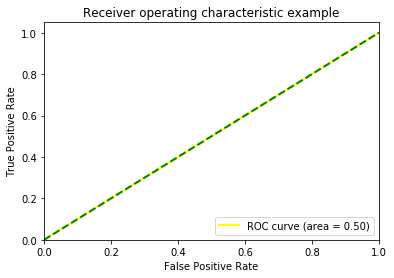

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='Yellow',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='Green', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      3442
           0       0.98      1.00      0.99    189133

    accuracy                           0.98    192575
   macro avg       0.49      0.50      0.50    192575
weighted avg       0.96      0.98      0.97    192575



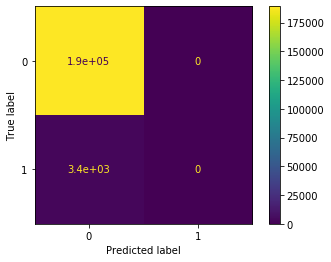

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(LR, X_test, y_test)  

plt.show() 

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, y_train))

[1]K Nearest Neighbor Training Accuracy: 0.9826812273138988


In [ ]:
Y_predict =knn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

matrix = classification_report(y_test,Y_predict,labels=[1,0])

print('Classification Report : \n',matrix)

Classification Report : 
               precision    recall  f1-score   support

           1       0.15      0.00      0.01      3442
           0       0.98      1.00      0.99    189133

    accuracy                           0.98    192575
   macro avg       0.57      0.50      0.50    192575
weighted avg       0.97      0.98      0.97    192575



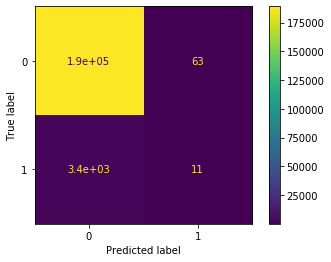

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(knn, X_test, y_test)  

plt.show()  

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
print('Decision Tree Classifier Training Accuracy:', dt.score(X_train, y_train))

Decision Tree Classifier Training Accuracy: 1.0


In [ ]:
Y_pred = dt.predict(X_test)

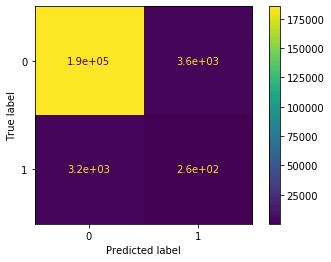

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, X_test, y_test)
plt.show()

# Random Forest

In [ ]:
RF = RandomForestClassifier()

RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

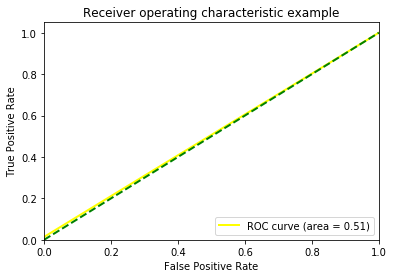

In [ ]:
y_pred = RF.predict(X_test)

from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='yellow',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

matrix = classification_report(y_test,y_pred,labels=[1,0])

print('Classification Report : \n',matrix)

Classification Report : 
               precision    recall  f1-score   support

           1       0.98      0.01      0.03      3442
           0       0.98      1.00      0.99    189133

    accuracy                           0.98    192575
   macro avg       0.98      0.51      0.51    192575
weighted avg       0.98      0.98      0.97    192575



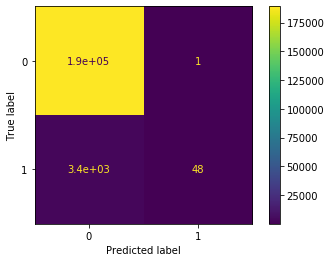

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(RF, X_test, y_test) 

plt.show() 